## Metric: Vacant Addresses

For the analysis of the best Pittsburgh neighborhood for being a Ghostbuster, one of the datasets we chose to analyze was vacant addresses per neighborhood. This was chosen under the assumption that there is more likely to be ghosts in abandonded and empty houses.

In [68]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
hoods = pd.read_csv("Hoods.csv", sep=",")
hoods


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.068796e+07,19600.573085
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223202e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.133208e+07,21174.473326
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.739570e+06,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,8.743618e+06,13811.917169
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.755059e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.754935e+07,18197.745741
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522062e+07,15,Stephanie Joy Everett,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.522420e+07,26390.549314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,2.339339e+07,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,2.338689e+07,31964.844864
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,3.683600e+06,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,3.683820e+06,9978.225999
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,6.409852e+06,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,6.425358e+06,25260.814467
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,1.027890e+07,15,Sophia Robison,pgh.admin,2020-08-14T14:52:26,pgh.admin,2020-08-14T14:52:26,NaN,1.027920e+07,16308.247349


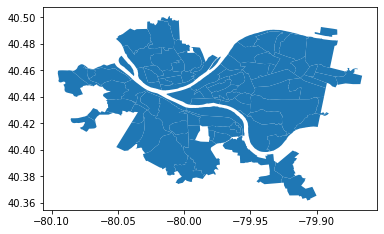

In [15]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()

In [23]:
vacancies = geopandas.read_file("Vacant_Property_Rates.shp") # read in the shapefile
vacancies
#vacancies.plot(column = 'ResVac')

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,TRACTCENUM,GEOIDNUM,Geoid_1,Tract1,ReslBuild,ResVac,pervacprop,geometry
0,42,003,431100,42003431100,4311,Census Tract 4311,431100.0,4.200343e+10,4.200343e+10,431100,1877,47,0.025040,"POLYGON ((-80.04602 40.49487, -80.04553 40.494..."
1,42,003,432300,42003432300,4323,Census Tract 4323,432300.0,4.200343e+10,4.200343e+10,432300,1309,27,0.020626,"POLYGON ((-80.06160 40.50581, -80.06160 40.505..."
2,42,003,563800,42003563800,5638,Census Tract 5638,563800.0,4.200356e+10,4.200356e+10,563800,1727,11,0.006369,"POLYGON ((-80.12156 40.53626, -80.11346 40.533..."
3,42,003,563300,42003563300,5633,Census Tract 5633,563300.0,4.200356e+10,4.200356e+10,563300,657,0,0.000000,"POLYGON ((-80.13451 40.58823, -80.13282 40.587..."
4,42,003,451104,42003451104,4511.04,Census Tract 4511.04,451104.0,4.200345e+10,4.200345e+10,451104,1410,0,0.000000,"POLYGON ((-80.24876 40.55465, -80.24825 40.554..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,42,003,980400,42003980400,9804,Census Tract 9804,980400.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-80.01394 40.48431, -80.01385 40.484..."
398,42,003,980500,42003980500,9805,Census Tract 9805,980500.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.93404 40.43771, -79.93404 40.437..."
399,42,003,980300,42003980300,9803,Census Tract 9803,980300.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.90137 40.42724, -79.90172 40.427..."
400,42,003,981000,42003981000,9810,Census Tract 9810,981000.0,4.200398e+10,0.000000e+00,0,0,0,0.000000,"POLYGON ((-79.93457 40.47217, -79.93481 40.472..."


In [26]:
vacantAddresses = hoods.merge(vacancies, how='left', left_on='tractce10', right_on='TRACTCE')
vacantAddresses = vacantAddresses[['hood', 'ResVac']]
vacantAddresses

,hood,ResVac
0,Chateau,0.0
1,Summer Hill,9.0
2,Northview Heights,21.0
3,Spring Hill-City View,41.0
4,Perry South,119.0
...,...,...
85,Overbrook,26.0
86,Chartiers City,36.0
87,Esplen,189.0
88,Ridgemont,35.0


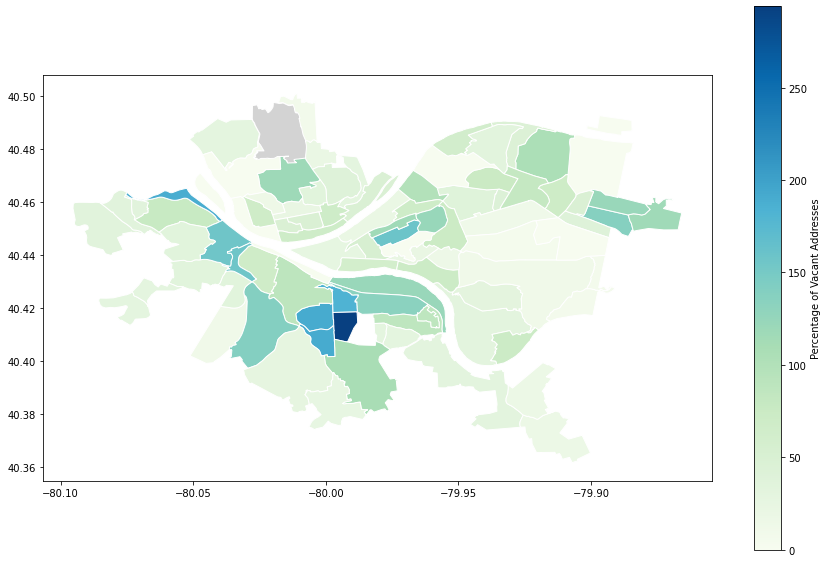

In [44]:
vacantMap = map.merge(vacantAddresses, how = 'left', left_on = 'hood', right_on = 'hood')
vacantMap.plot(column='ResVac',
                cmap = 'GnBu',
                  edgecolor = 'white',
                  legend = True,
                  legend_kwds = {'label': 'Percentage of Vacant Addresses'},
                  figsize = (15, 10),
                  missing_kwds = {'color': 'lightgrey'})

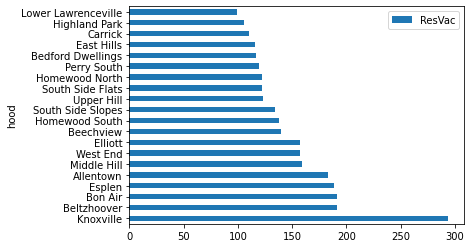

In [50]:
vacantAddresses = vacantAddresses.sort_values('ResVac', ascending=False)
vacantAddresses.head(20).plot.barh(x='hood')
